<a href="https://colab.research.google.com/github/Shristi1104/SUPPLY_CHAIN_EMISSION/blob/main/shell_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # for data analysis
import numpy as np  # for numerical data
import seaborn as sns  # for data visualization
import matplotlib.pyplot as plt  # for plotting

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Feature scaling
from sklearn.ensemble import RandomForestRegressor  # model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('supply_chain_emissions_2010_2016.csv')
df.head()

,Year,Industry,Commodity,Country,Scope1_Emissions_tCO2e,Scope2_Emissions_tCO2e,Scope3_Emissions_tCO2e,Total_Emissions_tCO2e
0,2010,Steel,Raw Steel,India,120,80,400,600
1,2011,Steel,Raw Steel,India,125,82,420,627
2,2012,Steel,Raw Steel,India,130,85,430,645
3,2013,Steel,Raw Steel,India,128,83,415,626
4,2014,Steel,Raw Steel,India,127,81,410,618


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Label encoding
le = LabelEncoder()
df['Industry'] = le.fit_transform(df['Industry'])
df['Commodity'] = le.fit_transform(df['Commodity'])
df['Country'] = le.fit_transform(df['Country'])  # <-- this was missing

# Drop any missing values
df = df.dropna()

# Features and target
X = df.drop(['Total_Emissions_tCO2e'], axis=1)
y = df['Total_Emissions_tCO2e']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

MSE: 44.29
R² Score: 1.00


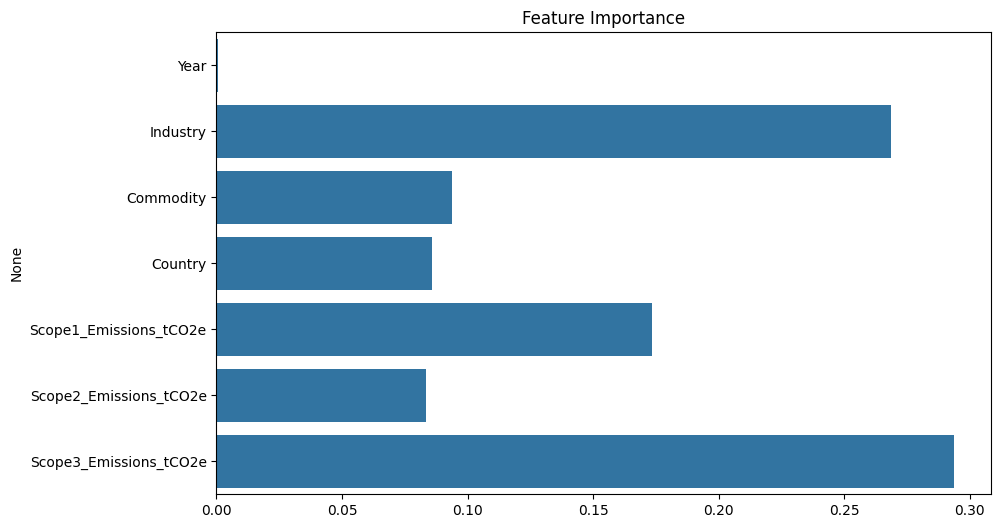

In [10]:
features = X.columns
importances = model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()